# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science



## Group #20: Final Project - World Cup Predictions 

**Harvard University**<br>
**Fall 2018**<br>
**Group Members:** <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings

from IPython.display import display

warnings.filterwarnings('ignore')

### Data Preparation

NameError: name 'df' is not defined

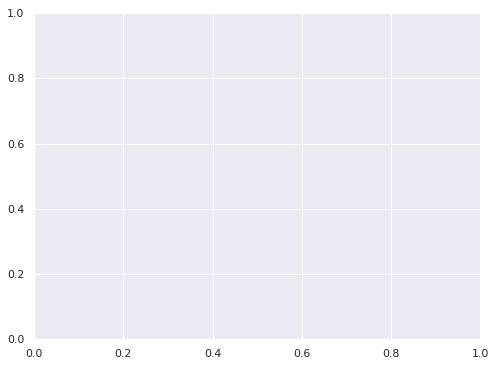

In [64]:
    
    # first compute a lowess fit to the data
    los = lw.lowess(train_data['outcome_num'], train_data[col], frac = 0.3)

    # now make the plots
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    df.plot(kind = 'scatter', x = col, y = 'outcome_num', ax = ax, alpha = 0.05)
    plt.plot(los[:, 0], los[:, 1], axes = ax, color = 'red')
    ax.set_xlabel(col)
    ax.set_ylabel('Outcome of the Match')
    ax.set_title('Outcome of the Match vs. ' + col)

In [2]:
# load the dataset for match results and team ratings
X = pd.read_csv('data/team/final_dataset.csv', index_col='Unnamed: 0')

# check for data types and missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 1638
Data columns (total 80 columns):
date                                1639 non-null object
home_team                           1639 non-null object
away_team                           1639 non-null object
home_score                          1639 non-null int64
away_score                          1639 non-null int64
tournament                          1639 non-null object
city                                1639 non-null object
country                             1639 non-null object
neutral                             1639 non-null int64
home_rank                           1639 non-null int64
home_rank_pts                       1639 non-null int64
away_rank                           1639 non-null int64
away_rank_pts                       1639 non-null int64
rank_diff                           1639 non-null int64
rank_pts_diff                       1639 non-null int64
outcome                             1639 non-nu

In [3]:
# change the Date feature to datetime type
X['date'] = pd.to_datetime(X['date'])


In [4]:
# split data into train and test sets
train_data = X[X['date'] <= '2018-06-13']
test_data = X[X['date'] > '2018-06-13']

### Exploratory Data Analysis

In [138]:
num_cols = ['ATT_diff',     'MID_diff',     'DEF_diff',  
            'ATT_age_diff', 'MID_age_diff', 'DEF_age_diff', 
            'ATT_ht_diff',  'MID_ht_diff',  'DEF_ht_diff', 
            'ATT_wt_diff',  'MID_wt_diff',  'DEF_wt_diff',  
            'diff_hrva_rwma', 'diff_hrvap_rwma', 'diff_hrva_rmean' , 'diff_hrvap_rmean', 
            'hrvo_rwma' , 'hrvop_rwma',
            'rank_pts_diff'
           
           ]
    
def wc_box(df, cols):
        
    # loop over the columns and create box plots
    for col in cols:
        fig = plt.figure(figsize=(8, 6))
        fig.clf()
        ax = fig.gca()
        ax.boxplot(column = col, by = 'outcome', vert=False, ax = ax)        
        ax.set_xlabel(col)
        ax.set_ylabel('Outcome of the Match')
        ax.set_title('Outcome vs. ' + col)  

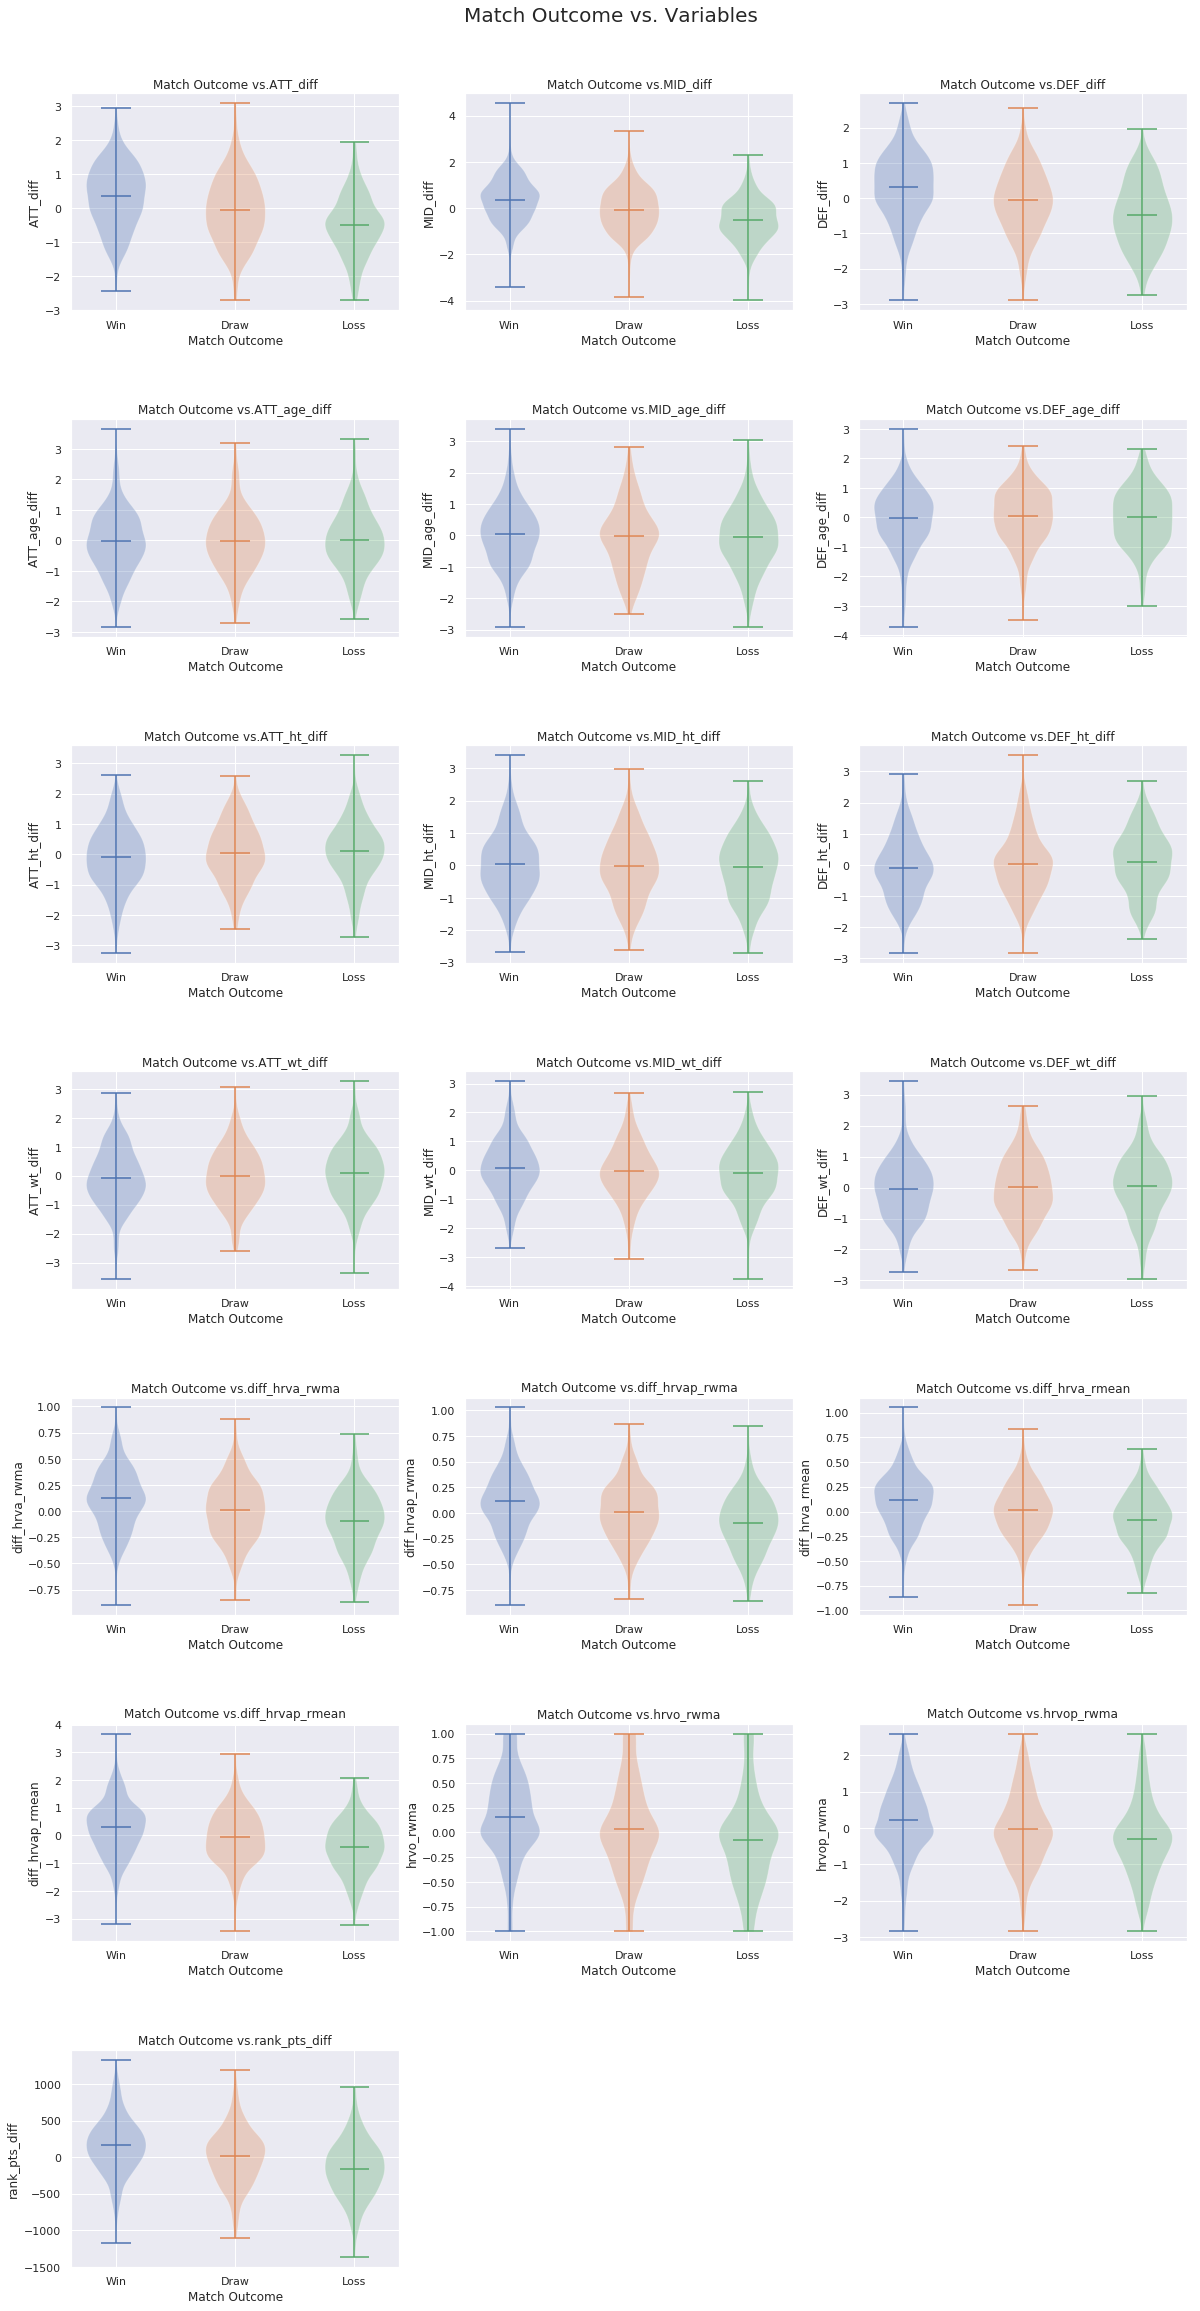

In [173]:
pos = ['W','D','L']


fig, axs = plt.subplots(7,3, figsize = (20,40))#, sharey=True)
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=0.5)

for col, ax in zip(num_cols,axs.ravel()):
    #los = lw.lowess(train_data['outcome_num'], train_data[col], frac = 0.3)
    #print(los)
    # now make the plots
    ax.violinplot(train_data[col][train_data['outcome'] == 'W'], [0] , vert = True, showmeans=True) 
    ax.violinplot(train_data[col][train_data['outcome'] == 'D'], [1] , vert = True, showmeans=True) 
    ax.violinplot(train_data[col][train_data['outcome'] == 'L'], [2] , vert = True, showmeans=True) 
    ax.set_xticks([y for y in range(3)])
    ax.set_xlabel('Match Outcome')
    ax.set_ylabel(col)
    ax.set_title('Match Outcome vs.' + col)
    
    #ax.setp(xticks=['Win','Draw','Loss'])
    
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')
fig.suptitle('Match Outcome vs. Variables', fontsize= 20, y = 0.91)

plt.setp(axs,
         xticklabels=['Win','Draw','Loss'])
plt.show()

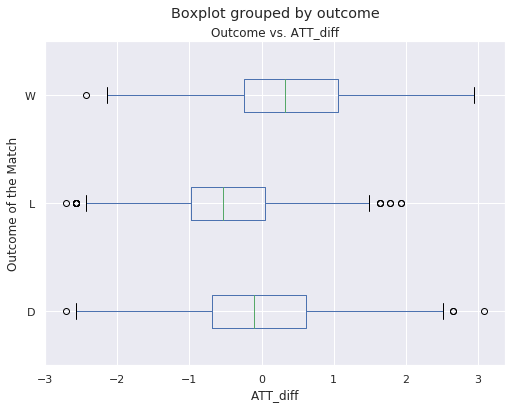

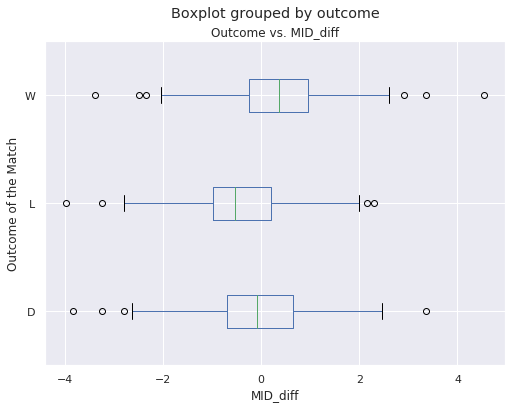

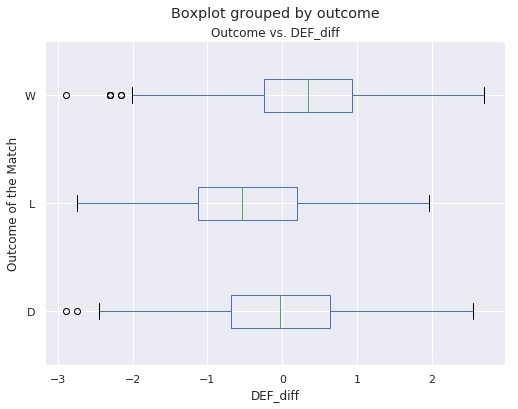

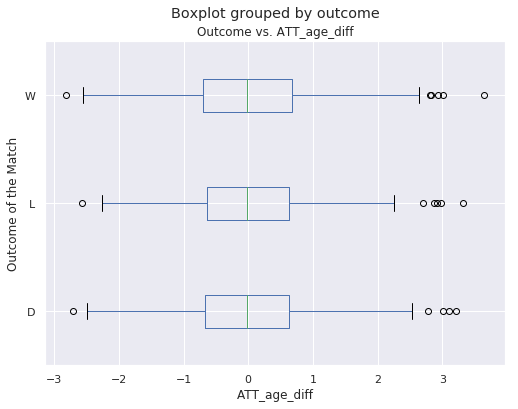

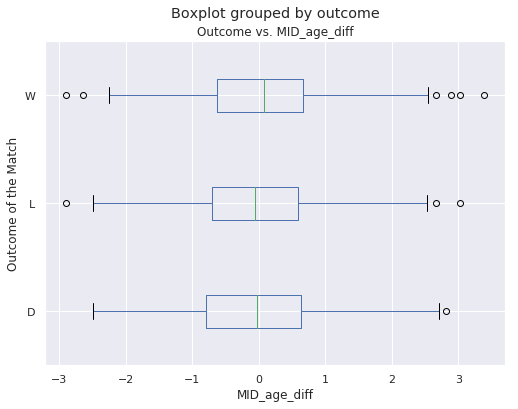

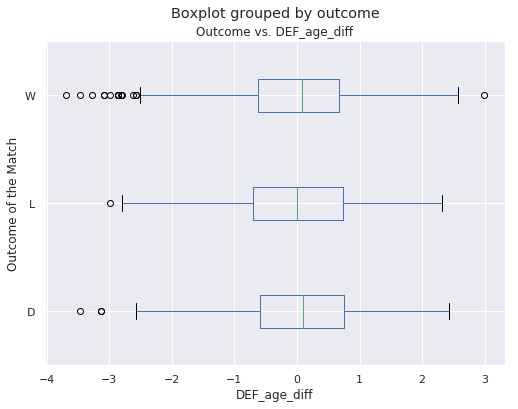

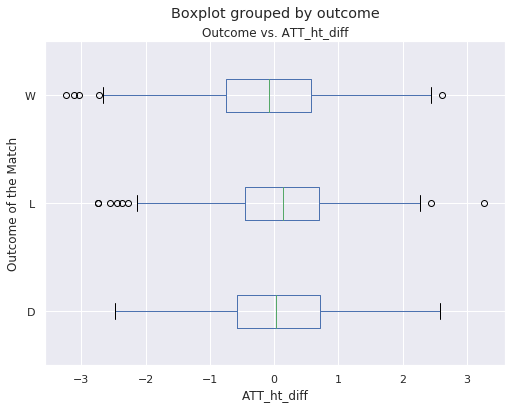

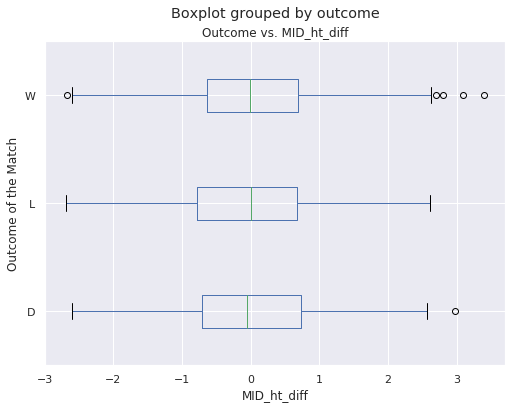

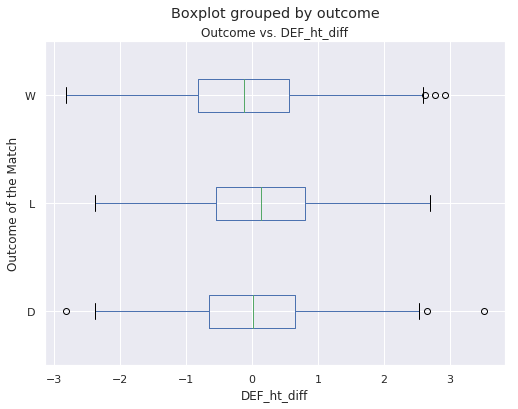

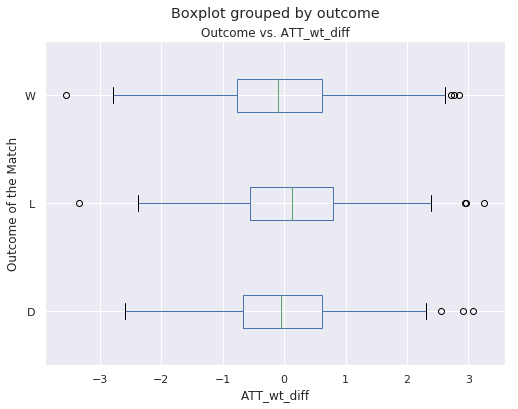

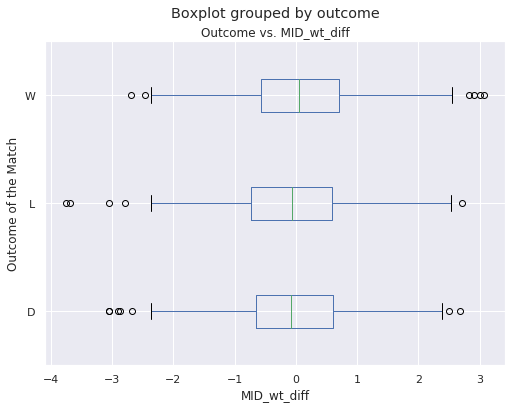

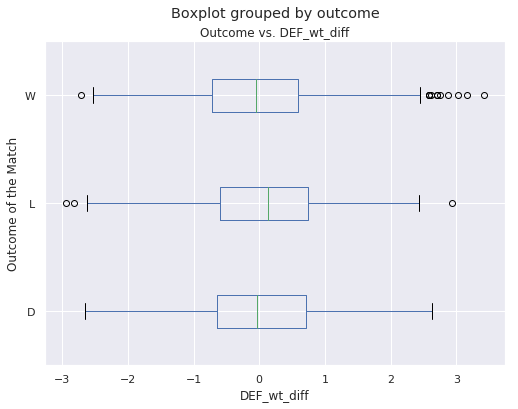

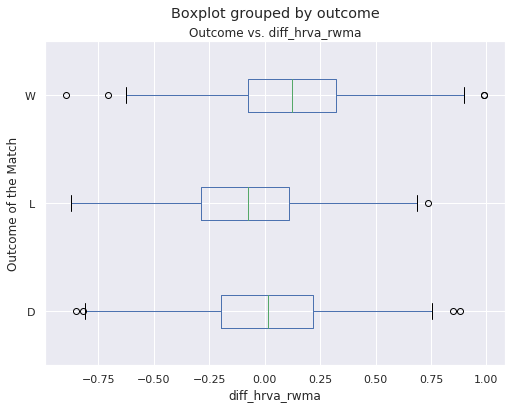

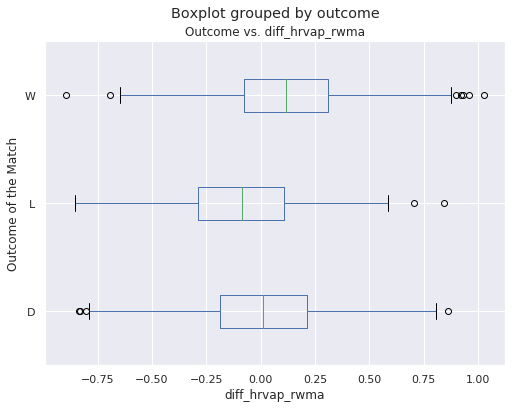

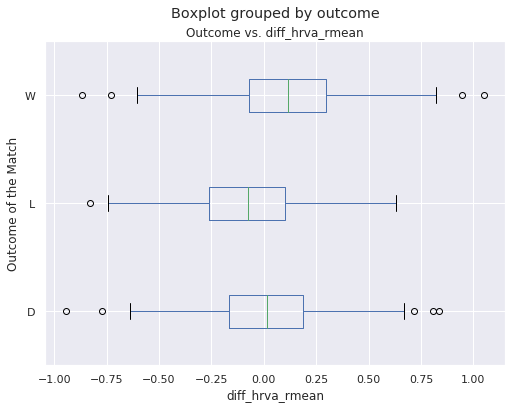

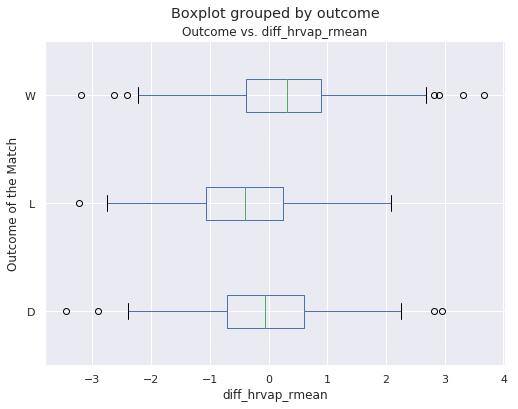

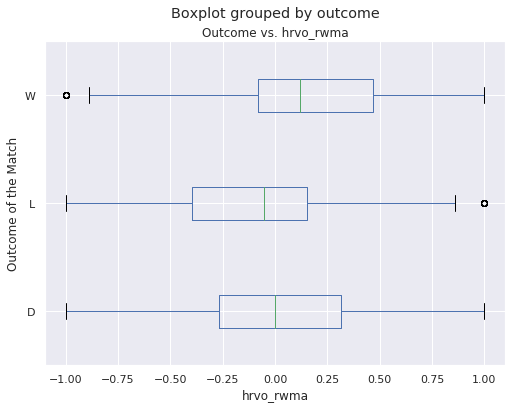

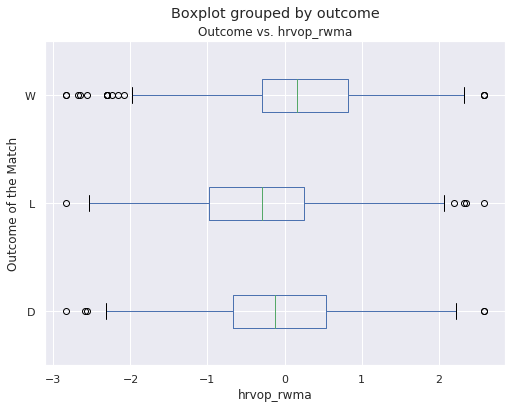

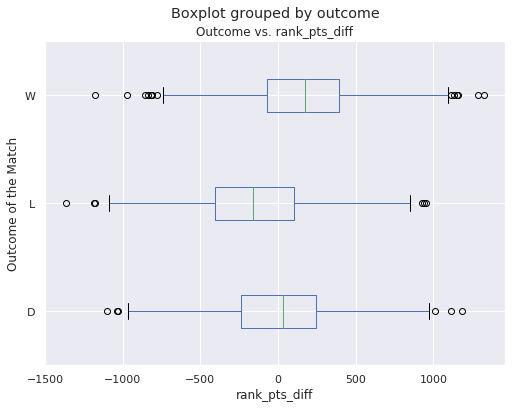

In [107]:
wc_box(train_data, num_cols)

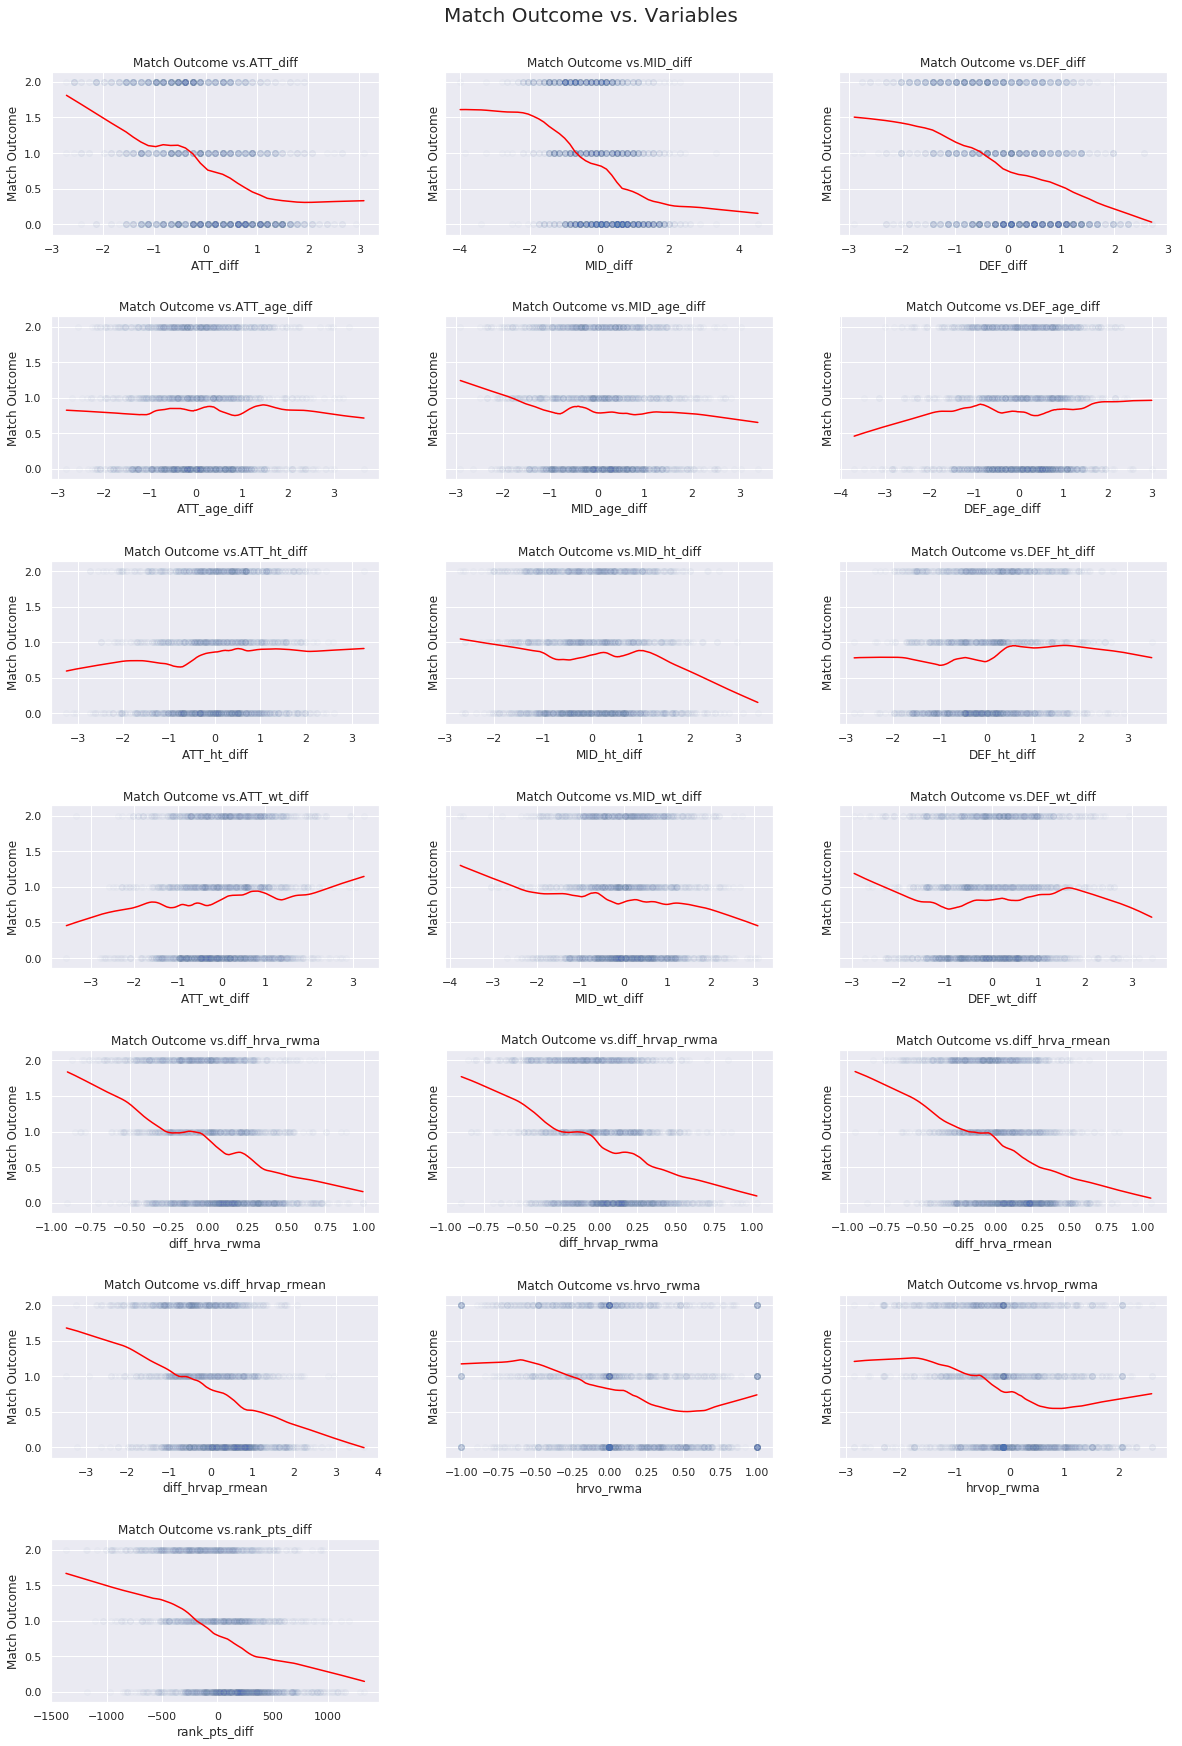

In [136]:
import statsmodels.nonparametric.smoothers_lowess as lw

fig, axs = plt.subplots(7,3, figsize = (20,30), sharey=True)
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.2, hspace=0.5)

for col, ax in zip(num_cols,axs.ravel()):
    los = lw.lowess(train_data['outcome_num'], train_data[col], frac = 0.3)
    #print(los)
    # now make the plots
    ax.scatter(x = train_data[col], y = train_data['outcome_num'], alpha = 0.02)
    ax.plot(los[:, 0], los[:, 1], color = 'red')
    ax.set_xlabel(col)
    ax.set_ylabel('Match Outcome')
    ax.set_title('Match Outcome vs.' + col)
    
axs[-1, -1].axis('off')
axs[-1, -2].axis('off')
fig.suptitle('Match Outcome vs. Variables', fontsize= 20, y = 0.91)
plt.show()

In [109]:
# sns.pairplot(train_data, 
#              vars = num_cols , 
#              hue="outcome_num")

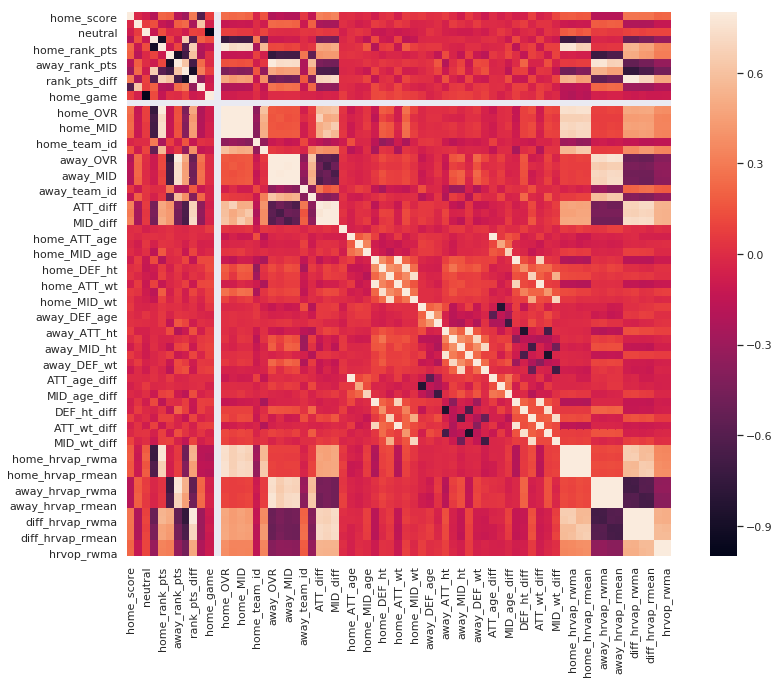

In [9]:
# setting up the correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

**As expected, we can clearly see that there's very strong correlation between ranks and rank points. We can also see that rank and team statistics are strongly correlated so, for example, home_rank and home_OVR are strongly correlated.**

In [10]:
#fig, ax = plt.subplots(1,1, figsize=(12,8))
#ax=sns.scatterplot(train_data.ATT_age_diff, train_data.ATT_diff, hue=train_data.outcome)

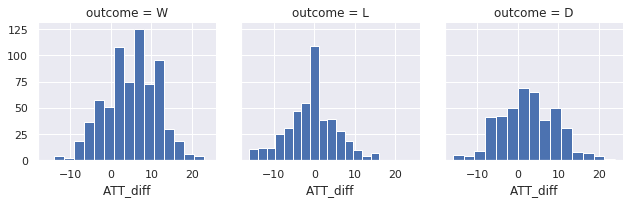

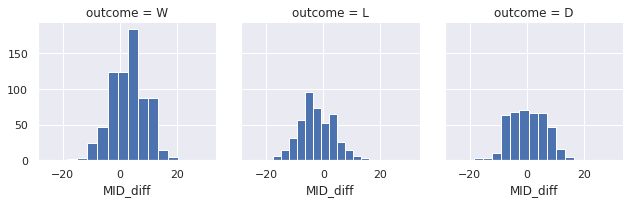

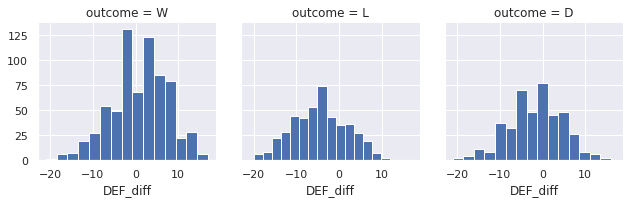

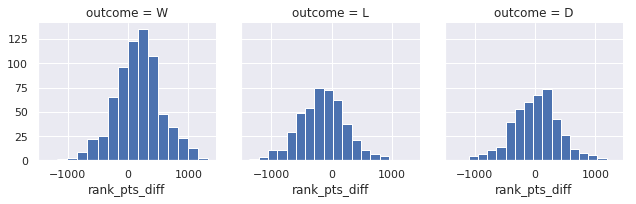

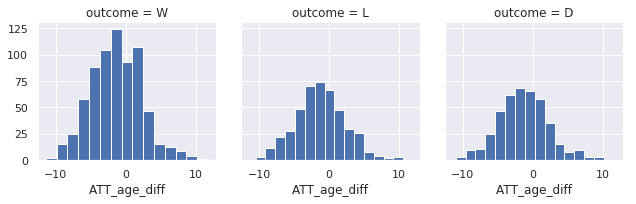

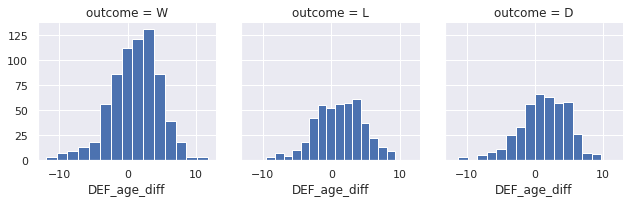

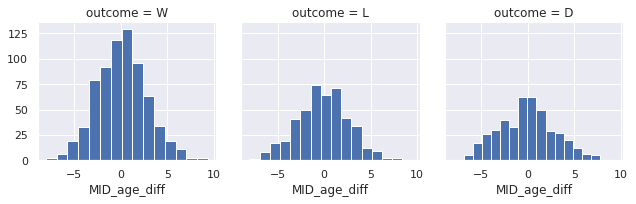

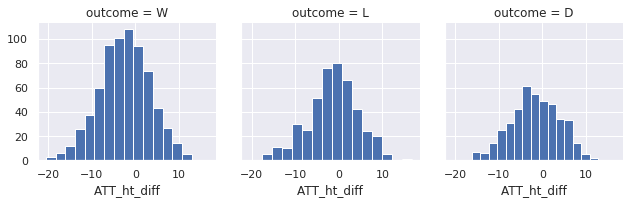

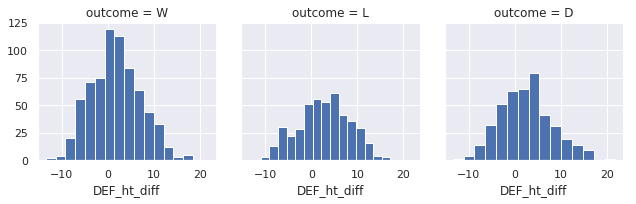

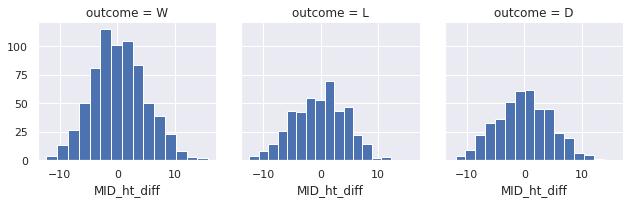

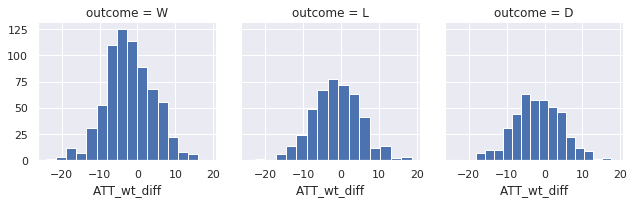

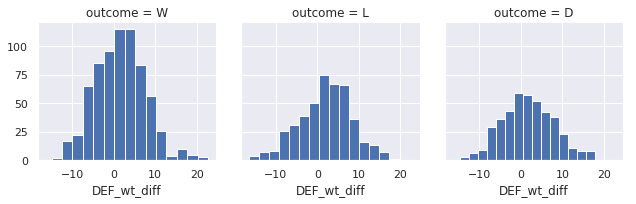

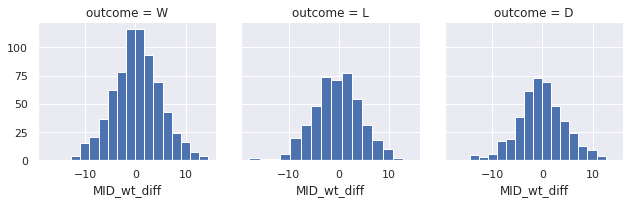

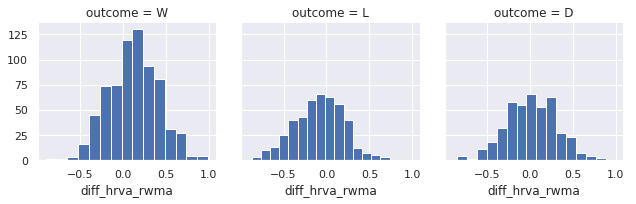

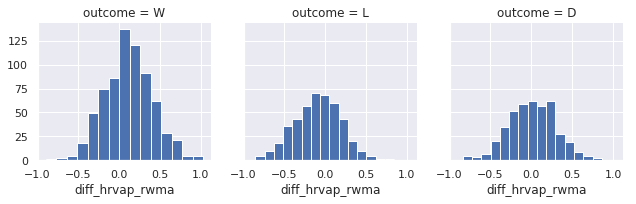

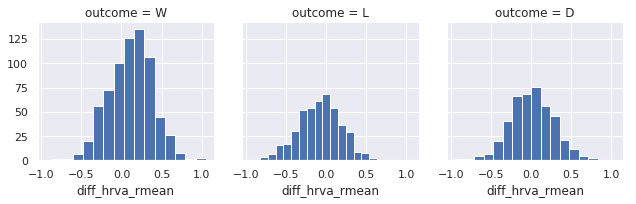

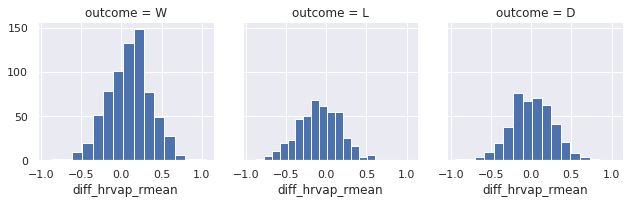

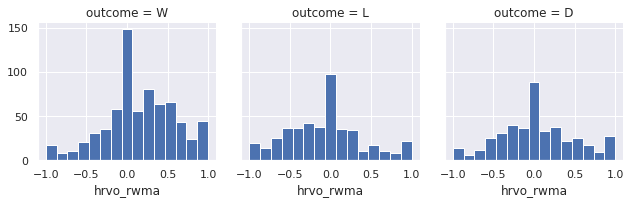

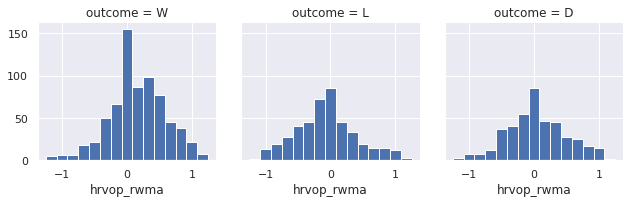

In [11]:
for item in num_cols:
    g = sns.FacetGrid(train_data, col="outcome")
    g = (g.map(plt.hist, item, bins=15))

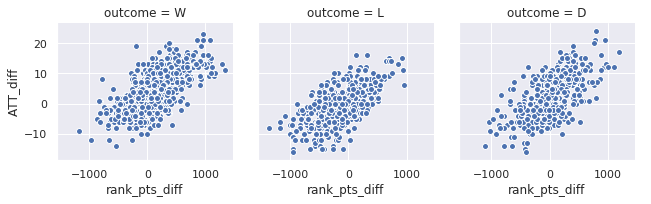

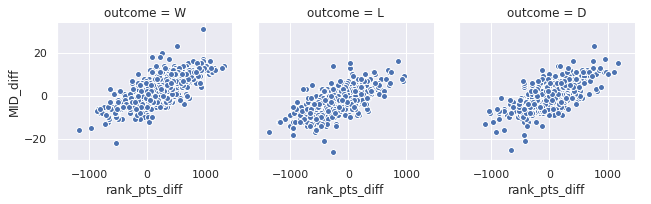

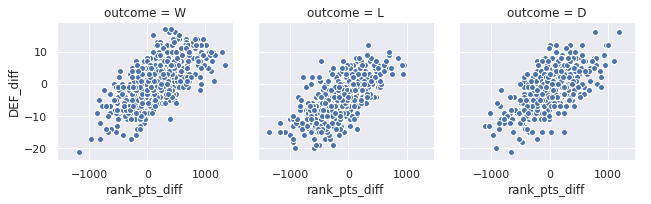

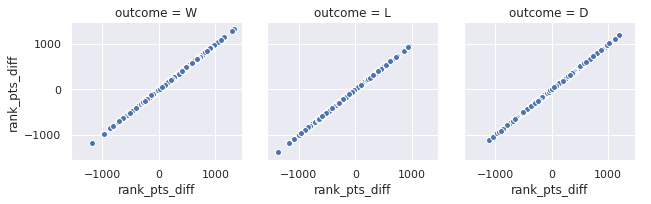

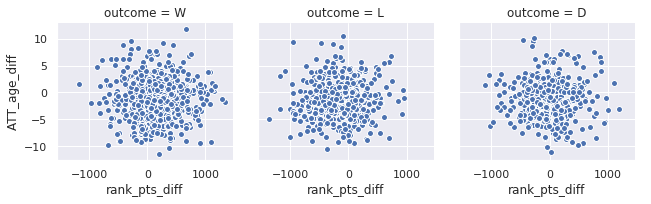

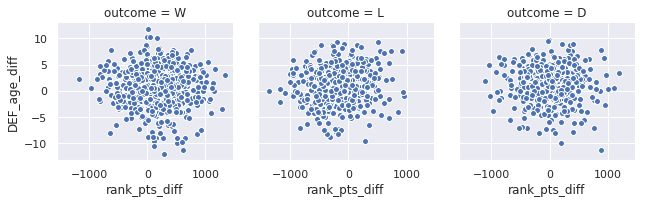

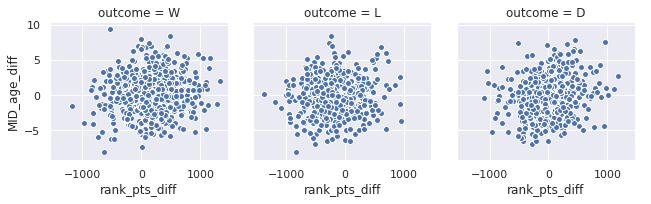

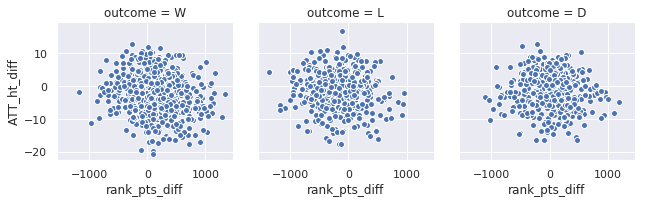

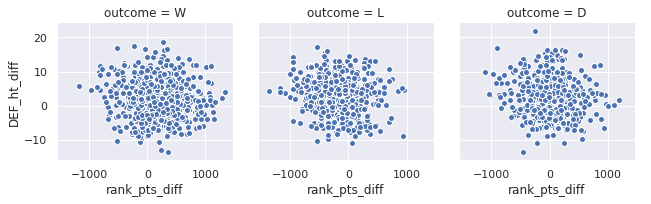

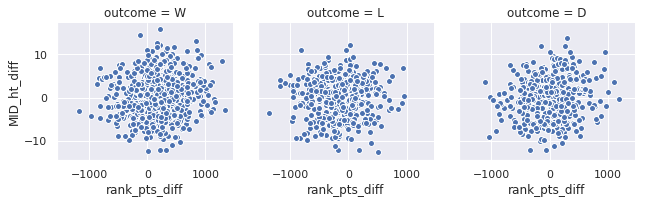

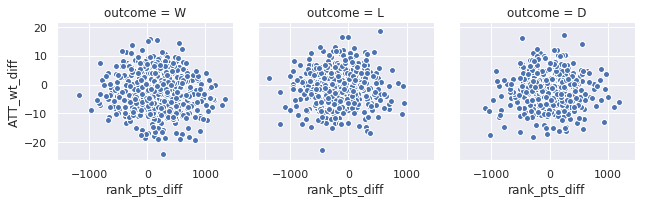

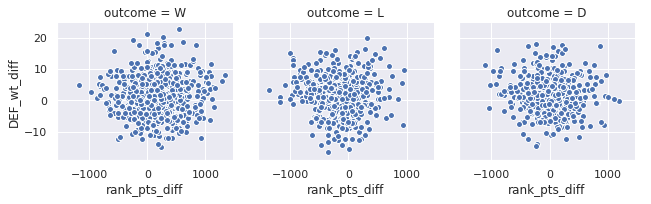

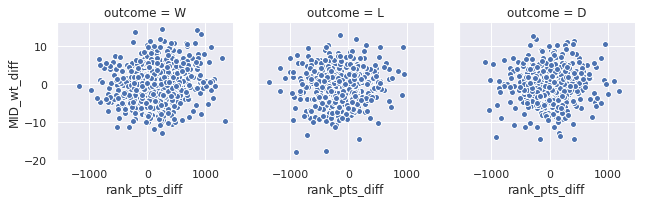

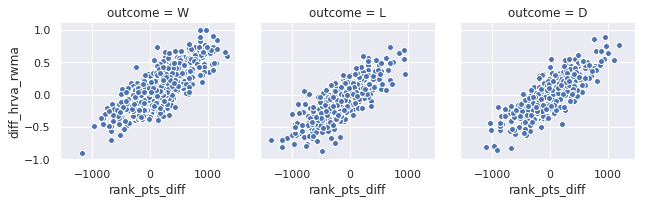

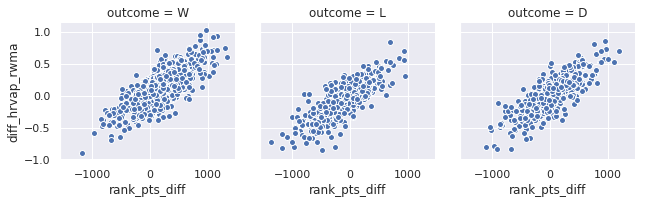

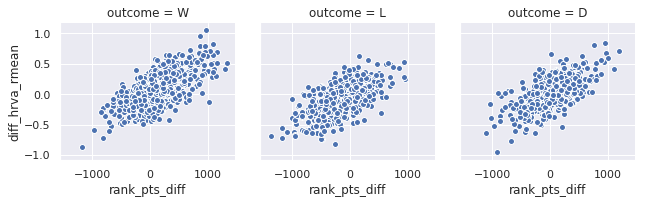

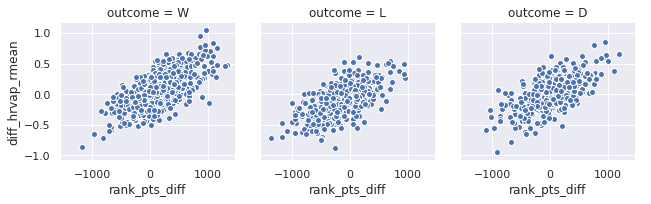

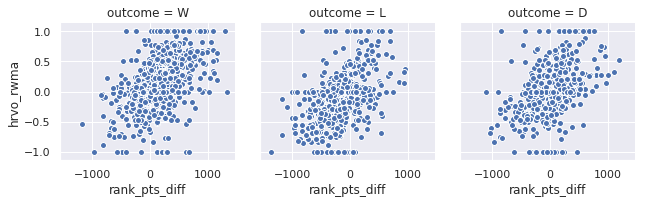

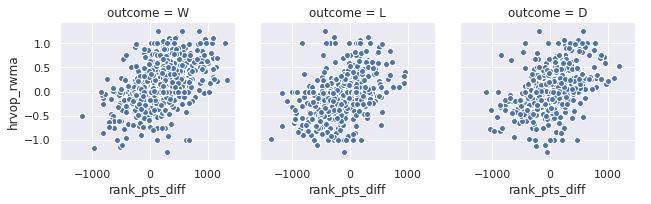

In [12]:
for item in num_cols:
    g = sns.FacetGrid(train_data, col="outcome")
    g = (g.map(plt.scatter, 'rank_pts_diff', item, edgecolor='w').add_legend())

### Model Building

In [13]:
# define the feature set for our model
predictors = ['ATT_diff', 'MID_diff', 'DEF_diff', 
              'ATT_age_diff', 'DEF_age_diff', 'MID_age_diff',
              'ATT_ht_diff', 'DEF_ht_diff', 'MID_ht_diff', 
              'ATT_wt_diff', 'DEF_wt_diff', 'MID_wt_diff',
             
              'diff_hrvap_rmean', 'hrvop_rwma'
             
             
             
             ] #'rank_pts_diff']

# scale the features
def scale_df(df, means, stds):
    cols_to_scale = means.index
    df = df.copy()
    df[cols_to_scale] = (df[cols_to_scale] - means) / stds
    return df

cols_to_scale = ['ATT_diff', 'MID_diff', 'DEF_diff', 
                 'ATT_age_diff', 'DEF_age_diff', 'MID_age_diff',
                 'ATT_ht_diff', 'DEF_ht_diff', 'MID_ht_diff', 
                 'ATT_wt_diff', 'DEF_wt_diff', 'MID_wt_diff',
                 'diff_hrvap_rmean','hrvop_rwma'
                
                ]#'rank_pts_diff']

train_means = train_data[cols_to_scale].mean(axis=0)
train_stds = train_data[cols_to_scale].std(axis=0)

train_data = scale_df(train_data, train_means, train_stds)
test_data = scale_df(test_data, train_means, train_stds)

# define x_train, y_train and x_test, y_test
x_train, y_train = train_data[predictors], train_data['outcome_num']
x_test, y_test = test_data[predictors], test_data['outcome_num']

display(x_train.describe())
display(x_test.describe())

ATT_diff      MID_diff      DEF_diff  ATT_age_diff  DEF_age_diff  MID_age_diff   ATT_ht_diff   DEF_ht_diff   MID_ht_diff   ATT_wt_diff   DEF_wt_diff   MID_wt_diff  diff_hrvap_rmean    hrvop_rwma
count  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03  1.575000e+03      1.575000e+03  1.575000e+03
mean  -8.423597e-18  5.251531e-18  4.636943e-17 -1.064404e-16 -5.677293e-16 -9.022765e-18 -8.162783e-16  2.771611e-16 -1.282924e-17 -9.805208e-16  1.086741e-16 -2.058318e-17     -9.107353e-17 -5.286776e-19
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00      1.000000e+00  1.000000e+00
min   -2.716873e+00 -3.987925e+00 -2.897571e+00 -2.825165e+00 -3.702072e+00 -2.903585e+00 -3.245965e+00 -2.818701e+00 -2.695820e+00 -3.558525e+00 -2.950966e+00 -3.759264e+00     -3.459317e+00 -2.843192e+00
25%   -6.849546e-01 -6.926300e-01 -6.872737e-01 -6.748563e-01 -6.507384e-01 -6.996411e-01 -6.627385e-01 -7.072625e-01 -7.046653e-01 -6.965913e-01 -6.703550e-01 -6.400483e-01     -6.742465e-01 -6.242508e-01
50%   -1.044065e-01  5.630056e-02  4.949194e-02 -1.393898e-02  5.920212e-02  9.305229e-04  2.379475e-02 -3.537316e-02 -9.825878e-03 -2.632432e-02  7.444182e-03  1.477581e-02      2.326244e-02 -9.904026e-02
75%    7.664157e-01  6.554450e-01  7.862576e-01  6.376696e-01  7.268283e-01  6.323470e-01  6.637833e-01  6.469911e-01  6.903999e-01  6.758602e-01  6.757351e-01  6.484766e-01      6.746322e-01  6.350348e-01
max    3.088608e+00  4.549884e+00  2.701848e+00  3.653687e+00  2.997698e+00  3.392539e+00  3.273191e+00  3.520104e+00  3.405121e+00  3.261176e+00  3.430398e+00  3.077663e+00      3.675608e+00  2.595390e+00

ATT_diff   MID_diff   DEF_diff  ATT_age_diff  DEF_age_diff  MID_age_diff  ATT_ht_diff  DEF_ht_diff  MID_ht_diff  ATT_wt_diff  DEF_wt_diff  MID_wt_diff  diff_hrvap_rmean  hrvop_rwma
count  64.000000  64.000000  64.000000     64.000000     64.000000     64.000000    64.000000    64.000000    64.000000    64.000000    64.000000    64.000000         64.000000   64.000000
mean    0.054337   0.053960   0.093237      0.199371     -0.227910      0.050824     0.024418     0.124396     0.030908     0.152867     0.026527     0.026548          0.119509   -0.197044
std     0.927969   0.957982   1.124258      1.008705      1.103443      1.140729     1.089459     1.156402     0.931176     0.954998     0.942321     1.058026          1.190780    0.952567
min    -1.700914  -2.190491  -2.013452     -1.819826     -3.250719     -3.510948    -2.931789    -3.043163    -1.654459    -2.483970    -3.016165    -2.456657         -3.161387   -2.843192
25%    -0.684955  -0.542844  -0.613597     -0.440809     -1.029217     -0.666567    -0.837281    -0.475319    -0.785461    -0.338850    -0.398692    -0.444657         -0.618961   -0.632251
50%     0.040731   0.056301   0.049492      0.283939     -0.373344      0.082113     0.029613     0.323766     0.171515     0.215717     0.086226     0.155598         -0.034101   -0.191811
75%     0.766416   0.805231   0.823096      0.763337      0.552869      0.862363     0.724873     0.952259     0.708354     0.715757     0.571824     0.648477          0.737571    0.381845
max     2.072649   2.153306   2.849201      3.039313      1.714163      2.526597     3.072468     2.873653     2.058533     2.718579     2.427961     1.887714          3.202056    2.029777

In [14]:
# fit logistic (ovr) regression
logreg_ovr = LogisticRegressionCV(multi_class = 'ovr', cv=5, penalty='l2')
logreg_ovr.fit(x_train, y_train)
print('Logistic Regression (OVR) Train Score: ',logreg_ovr.score(x_train, y_train))
print('Logistic Regression (OVR) CV Score: ',cross_val_score(logreg_ovr, x_train, y_train, cv=5).mean())

# fit logistic (multinomial) regression
logreg_multinomial = LogisticRegressionCV(multi_class = 'multinomial', solver='saga', cv=5, penalty='l2')
logreg_multinomial.fit(x_train, y_train)
print('Logistic Regression (Multinomial) Train Score: ',logreg_multinomial.score(x_train, y_train))
print('Logistic Regression (Multinomial) CV Score: ',cross_val_score(logreg_multinomial, x_train, y_train, cv=5).mean())

Logistic Regression (OVR) Train Score:  0.52126984127
Logistic Regression (OVR) CV Score:  0.509224611557
Logistic Regression (Multinomial) Train Score:  0.51619047619
Logistic Regression (Multinomial) CV Score:  0.509861528637


In [15]:
# fit lda and qda 
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
lda.fit(x_train, y_train)
qda.fit(x_train, y_train)

print('LDA Train Score: ',lda.score(x_train, y_train))
print('LDA CV Score: ',cross_val_score(lda, x_train, y_train, cv=5).mean())
print('QDA Train Score: ',qda.score(x_train, y_train))
print('QDA CV Score: ',cross_val_score(qda, x_train, y_train, cv=5).mean())

LDA Train Score:  0.519365079365
LDA CV Score:  0.50288545142
QDA Train Score:  0.546666666667
QDA CV Score:  0.466674678041


In [16]:
# confusion matrix for the lda model
#pd.crosstab(np.array(y_test), lda.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

In [17]:
# confusion matrix for the qda model
#pd.crosstab(np.array(y_test), qda.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

In [18]:
# define the list of depths we want to test
depths = list(range(1, 21))
train_scores = []
cvmeans = []
cvstds = []

for depth in depths:
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    
    # Perform 5-fold cross validation and store results
    train_scores.append(accuracy_score(y_train, dtree.fit(x_train, y_train).predict(x_train)))
    scores = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=5)
    cvmeans.append(scores.mean())
    cvstds.append(scores.std())

cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

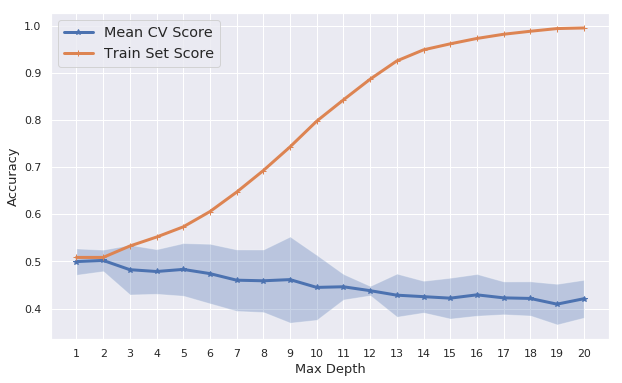

In [19]:
# define the figure and axes
fig, ax = plt.subplots(1,1,figsize=(10,6))

# make the plot
ax.plot(depths, cvmeans, '*-', label="Mean CV Score", lw=3)
ax.fill_between(depths, cvmeans - 2*cvstds, cvmeans + 2*cvstds, alpha=0.3)
ax.plot(depths, train_scores, '-+', label="Train Set Score", lw=3)
ax.legend(fontsize='large')
ax.set_ylabel("Accuracy", fontsize=13)
ax.set_xlabel("Max Depth", fontsize=13)
ax.set_xticks(depths);

Training accuracy hits nearly perfect at depth 20 but we don't think that a depth-20 tree will generalize well. 
`DecisionTreeClassifier` has some randomness in it, so depending on the random choices it made, depth 2 or depth 3 trees might come out with better validation performance. We'll choose depth 3 here.

In [38]:
# set depth to 19
best_depth = 2

# fit the tree model on test set using depth=3
dtree = DecisionTreeClassifier(criterion='gini', max_depth=best_depth)
dtree.fit(x_train, y_train)
train_score = accuracy_score(y_train, dtree.fit(x_train, y_train).predict(x_train))
test_score = accuracy_score(y_test, dtree.fit(x_train, y_train).predict(x_test))

# print out train and test scores
print('Accuracy on Train Set at depth=19: {:.2f}%'.format(train_score * 100))
print('Accuracy on Test Set at depth=19: {:.2f}%'.format(test_score * 100))

Accuracy on Train Set at depth=19: 50.86%
Accuracy on Test Set at depth=19: 59.38%


In [39]:
# initializing variables
n_trees = 100
estimators = []
bagging_train = np.zeros((x_train.shape[0], n_trees))
bagging_test = np.zeros((x_test.shape[0], n_trees))

# conduct bootstraping iterations
for i in range(n_trees):
    simpletree = DecisionTreeClassifier(criterion='gini', max_depth=10)
    boot_xx, boot_y = resample(x_train, y_train)
    estimators.append(simpletree.fit(boot_xx, boot_y))
    bagging_train[:,i] = simpletree.predict(x_train)   
    bagging_test[:,i] = simpletree.predict(x_test)
    
#Make Predictions Dataframe
columns = ["Bootstrap-Model_"+str(i+1) for i in range(n_trees)]
bagging_train = pd.DataFrame(bagging_train, columns=columns)
bagging_test = pd.DataFrame(bagging_test, columns=columns)
display(bagging_train.head())
display(bagging_test.head())

Bootstrap-Model_1  Bootstrap-Model_2  Bootstrap-Model_3  Bootstrap-Model_4  Bootstrap-Model_5  Bootstrap-Model_6  Bootstrap-Model_7  Bootstrap-Model_8  Bootstrap-Model_9  Bootstrap-Model_10  Bootstrap-Model_11  Bootstrap-Model_12  Bootstrap-Model_13  Bootstrap-Model_14  Bootstrap-Model_15  Bootstrap-Model_16  Bootstrap-Model_17  Bootstrap-Model_18  Bootstrap-Model_19  Bootstrap-Model_20  Bootstrap-Model_21  Bootstrap-Model_22  Bootstrap-Model_23  Bootstrap-Model_24  Bootstrap-Model_25  \
0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                 0.0                 1.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 1.0   
1                0.0                1.0                0.0                0.0                0.0                2.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 1.0                 0.0                 0.0   
2                0.0                2.0                2.0                2.0                2.0                0.0                2.0                2.0                2.0                 2.0                 2.0                 2.0                 2.0                 1.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0                 2.0   
3                0.0                2.0                2.0                2.0                2.0                0.0                1.0                0.0                0.0                 0.0                 2.0                 2.0                 1.0                 2.0                 2.0                 1.0                 0.0                 0.0                 0.0                 2.0                 2.0                 2.0                 2.0                 1.0                 0.0   
4                0.0                0.0                2.0                0.0                0.0                0.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                 2.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0   

   Bootstrap-Model_26  Bootstrap-Model_27  Bootstrap-Model_28  Bootstrap-Model_29  Bootstrap-Model_30  Bootstrap-Model_31  Bootstrap-Model_32  Bootstrap-Model_33  Bootstrap-Model_34  Bootstrap-Model_35  Bootstrap-Model_36  Bootstrap-Model_37  Bootstrap-Model_38  Bootstrap-Model_39  Bootstrap-Model_40  Bootstrap-Model_41  Bootstrap-Model_42  Bootstrap-Model_43  Bootstrap-Model_44  Bootstrap-Model_45  Bootstrap-Model_46  Bootstrap-Model_47  Bootstrap-Model_48  Bootstrap-Model_49  \
0                 1.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 1.0                 1.0                 0.0                 0.0                 0.0   
1                 0.0                 0.0               

Bootstrap-Model_1  Bootstrap-Model_2  Bootstrap-Model_3  Bootstrap-Model_4  Bootstrap-Model_5  Bootstrap-Model_6  Bootstrap-Model_7  Bootstrap-Model_8  Bootstrap-Model_9  Bootstrap-Model_10  Bootstrap-Model_11  Bootstrap-Model_12  Bootstrap-Model_13  Bootstrap-Model_14  Bootstrap-Model_15  Bootstrap-Model_16  Bootstrap-Model_17  Bootstrap-Model_18  Bootstrap-Model_19  Bootstrap-Model_20  Bootstrap-Model_21  Bootstrap-Model_22  Bootstrap-Model_23  Bootstrap-Model_24  Bootstrap-Model_25  \
0                1.0                2.0                0.0                2.0                2.0                1.0                0.0                0.0                2.0                 2.0                 0.0                 0.0                 2.0                 2.0                 0.0                 1.0                 1.0                 0.0                 1.0                 0.0                 0.0                 0.0                 2.0                 0.0                 0.0   
1                2.0                2.0                0.0                0.0                2.0                2.0                0.0                2.0                0.0                 2.0                 2.0                 1.0                 2.0                 1.0                 0.0                 2.0                 0.0                 0.0                 0.0                 0.0                 2.0                 1.0                 0.0                 2.0                 2.0   
2                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                 1.0                 0.0                 0.0                 0.0                 2.0                 1.0                 1.0                 0.0                 0.0                 0.0                 0.0                 2.0                 0.0                 1.0                 0.0                 0.0   
3                2.0                2.0                1.0                1.0                1.0                0.0                2.0                0.0                1.0                 0.0                 0.0                 0.0                 0.0                 2.0                 0.0                 1.0                 2.0                 0.0                 0.0                 0.0                 0.0                 1.0                 2.0                 1.0                 0.0   
4                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 0.0                 2.0                 0.0   

   Bootstrap-Model_26  Bootstrap-Model_27  Bootstrap-Model_28  Bootstrap-Model_29  Bootstrap-Model_30  Bootstrap-Model_31  Bootstrap-Model_32  Bootstrap-Model_33  Bootstrap-Model_34  Bootstrap-Model_35  Bootstrap-Model_36  Bootstrap-Model_37  Bootstrap-Model_38  Bootstrap-Model_39  Bootstrap-Model_40  Bootstrap-Model_41  Bootstrap-Model_42  Bootstrap-Model_43  Bootstrap-Model_44  Bootstrap-Model_45  Bootstrap-Model_46  Bootstrap-Model_47  Bootstrap-Model_48  Bootstrap-Model_49  \
0                 1.0                 0.0                 0.0                 2.0                 0.0                 0.0                 0.0                 1.0                 0.0                 0.0                 0.0                 1.0                 0.0                 1.0                 0.0                 1.0                 1.0                 0.0                 0.0                 2.0                 2.0                 2.0                 0.0                 0.0   
1                 2.0                 2.0               

In [40]:
def get_prediction(df, count=-1):
    count = df.shape[1] if count==-1 else count
    temp = df.iloc[:,0:count]
    return np.mean(temp, axis=1)>0.5

bagged_train_score = accuracy_score(y_train, get_prediction(bagging_train, count=-1))
bagged_test_score = accuracy_score(y_test, get_prediction(bagging_test, count=-1))

# check accuracy of the bagged model in train and test sets
print('Training Set Accuracy: {:.2f}%'.format(bagged_train_score * 100))
print('Testing Set Accuracy: {:.2f}%'.format(bagged_test_score * 100))

Training Set Accuracy: 57.90%
Testing Set Accuracy: 40.62%


In [41]:
# confusion matrix for the bagging model
pd.crosstab(np.array(y_test), get_prediction(bagging_test, count=-1), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted  False  True  All
Actual                     
0             15    11   26
1              2    11   13
2              2    23   25
All           19    45   64

In [42]:
# fit a Random Forest model
rforest = RandomForestClassifier(n_estimators=100, max_depth=10)
rforest.fit(x_train, y_train)

# predict
y_pred_train = rforest.predict(x_train)
y_pred_test = rforest.predict(x_test)

# performance evaluation
rf_train_score = accuracy_score(y_train, y_pred_train)
rf_test_score = accuracy_score(y_test, y_pred_test)

print("Training Set Accuracy: {:.2f}%".format(rf_train_score * 100))
print("Testing Set Accuracy: {:.2f}%".format(rf_test_score * 100))

Training Set Accuracy: 92.44%
Testing Set Accuracy: 53.12%


In [43]:
# confusion matrix for the random forest model
#pd.crosstab(np.array(y_test), rforest.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

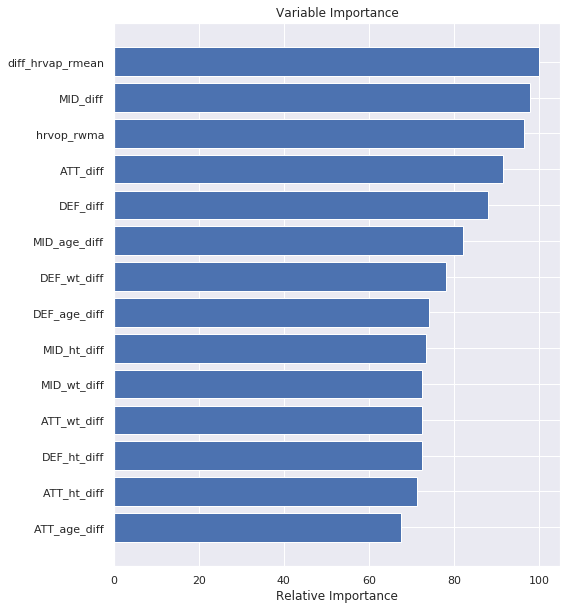

In [44]:
#Top Features
feature_importance = rforest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

#Plot
plt.figure(figsize=(8,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance');

Accuracy, Training Set : 100.0%
Accuracy, Testing Set : 51.5625%
Best iteration [52] => 0.59375


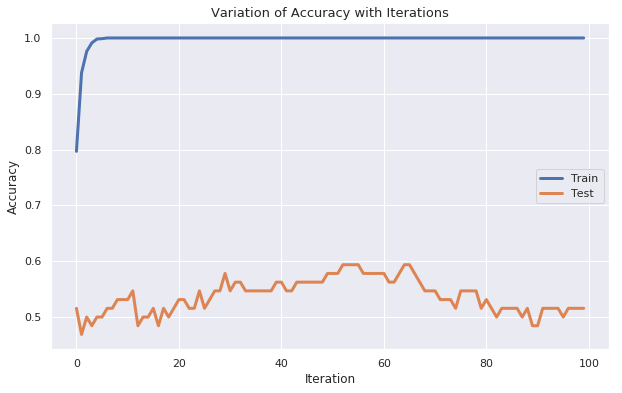

In [45]:
# fit an Adaboost model
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, learning_rate=0.05)
adaboost.fit(x_train, y_train)

# predict
y_pred_train = adaboost.predict(x_train)
y_pred_test = adaboost.predict(x_test)

# performance evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Accuracy, Training Set :",str(train_score)+'%')
print("Accuracy, Testing Set :",str(test_score)+'%')

# plot iteration based score
boost_train_scores = list(adaboost.staged_score(x_train,y_train))
boost_test_scores = list(adaboost.staged_score(x_test, y_test))

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(boost_train_scores, label='Train', lw=3)
ax.plot(boost_test_scores, label='Test', lw=3)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title("Variation of Accuracy with Iterations", fontsize=13)
ax.legend();

iteration = np.argmax(boost_test_scores)
print('Best iteration [{}] => {}'.format(iteration, boost_test_scores[iteration]))

In [46]:
# confusion matrix for the adaboost model
pd.crosstab(np.array(y_test), adaboost.predict(x_test), margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted   0   1   2  All
Actual                    
0          20   2   4   26
1           7   2   4   13
2           8   6  11   25
All        35  10  19   64

In [47]:
kvals = list(range(10,200,10))
knn = GridSearchCV(
    KNeighborsClassifier(),
    {'n_neighbors': kvals}).fit(x_train, y_train)

best_k = knn.best_params_['n_neighbors']
print("Best k:", best_k)

best_knn_clf = KNeighborsClassifier(n_neighbors=best_k).fit(x_train, y_train)
#print('kNN Train Score:', knn.score(x_train, y_train))
#print('kNN Test Score:', knn.score(x_test, y_test))

Best k: 100


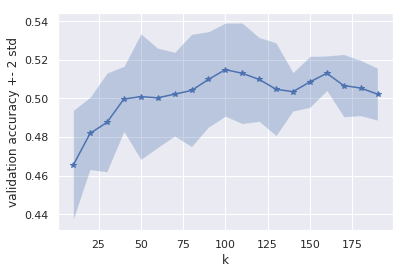

In [48]:
plt.plot(kvals, knn.cv_results_['mean_test_score'], '-*')
plt.fill_between(
    kvals,
    knn.cv_results_['mean_test_score'] - 2 * knn.cv_results_['std_test_score'],
    knn.cv_results_['mean_test_score'] + 2 * knn.cv_results_['std_test_score'],
    alpha=.3)
plt.xlabel('k')
plt.ylabel('validation accuracy +- 2 std');

### Model Comparison

In [49]:
# create a list of all classifiers
named_classifiers = [
    ("Logistic Regression (OVR)", logreg_ovr),
    ("Logistic Regression (Multinomial)", logreg_multinomial),
    ("Linear Discriminant Analysis ", lda),
    ("Quadratic Discriminant Analysis", qda),
    (f"Depth-{best_depth} Decision Tree", dtree),
    ("Depth-10 Random Forest", rforest),
    ("Boosting", adaboost),
    (f"k-NN (k={best_k})", best_knn_clf),
]

In [50]:
# run cross-validation on all models
cv_scores = [
    cross_val_score(clf, x_train, y_train, cv=5, n_jobs=-1)
    for name, clf in named_classifiers
]

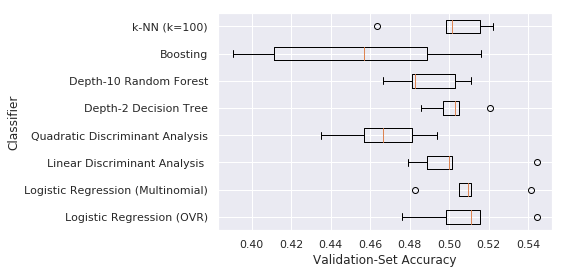

In [51]:
# visualize CV accuracy for each of the models
positions = np.arange(len(named_classifiers))
plt.boxplot(cv_scores, vert=False, positions=positions);
plt.yticks(positions, [name for name, model in named_classifiers])
plt.ylabel("Classifier")
plt.xlabel("Validation-Set Accuracy");

In [52]:
# summarize the above results in a table
performance_estimates = pd.DataFrame([
    [scores.mean(), scores.std()] for scores in cv_scores
], index=[name for name, model in named_classifiers], columns=["cv_accuracy", "cv_std"])

performance_estimates.sort_values('cv_accuracy')

cv_accuracy    cv_std
Boosting                              0.452765  0.046701
Quadratic Discriminant Analysis       0.466675  0.020156
Depth-10 Random Forest                0.488903  0.016090
k-NN (k=100)                          0.500322  0.020419
Depth-2 Decision Tree                 0.502226  0.011384
Linear Discriminant Analysis          0.502885  0.022352
Logistic Regression (OVR)             0.509225  0.022386
Logistic Regression (Multinomial)     0.509862  0.018809

**From the above table, we can see that Logistic Regression (Multinomial) model performs best on the validation set. Now, let's evaluate each fitted model's performance on the test set.**

In [53]:
performance_estimates.assign(test_accuracy=[
        accuracy_score(y_test, clf.predict(x_test))
        for name, clf in named_classifiers]).sort_values('test_accuracy')

cv_accuracy    cv_std  test_accuracy
Logistic Regression (Multinomial)     0.509862  0.018809       0.500000
Boosting                              0.452765  0.046701       0.515625
Depth-10 Random Forest                0.488903  0.016090       0.531250
k-NN (k=100)                          0.500322  0.020419       0.531250
Logistic Regression (OVR)             0.509225  0.022386       0.546875
Linear Discriminant Analysis          0.502885  0.022352       0.546875
Quadratic Discriminant Analysis       0.466675  0.020156       0.562500
Depth-2 Decision Tree                 0.502226  0.011384       0.593750

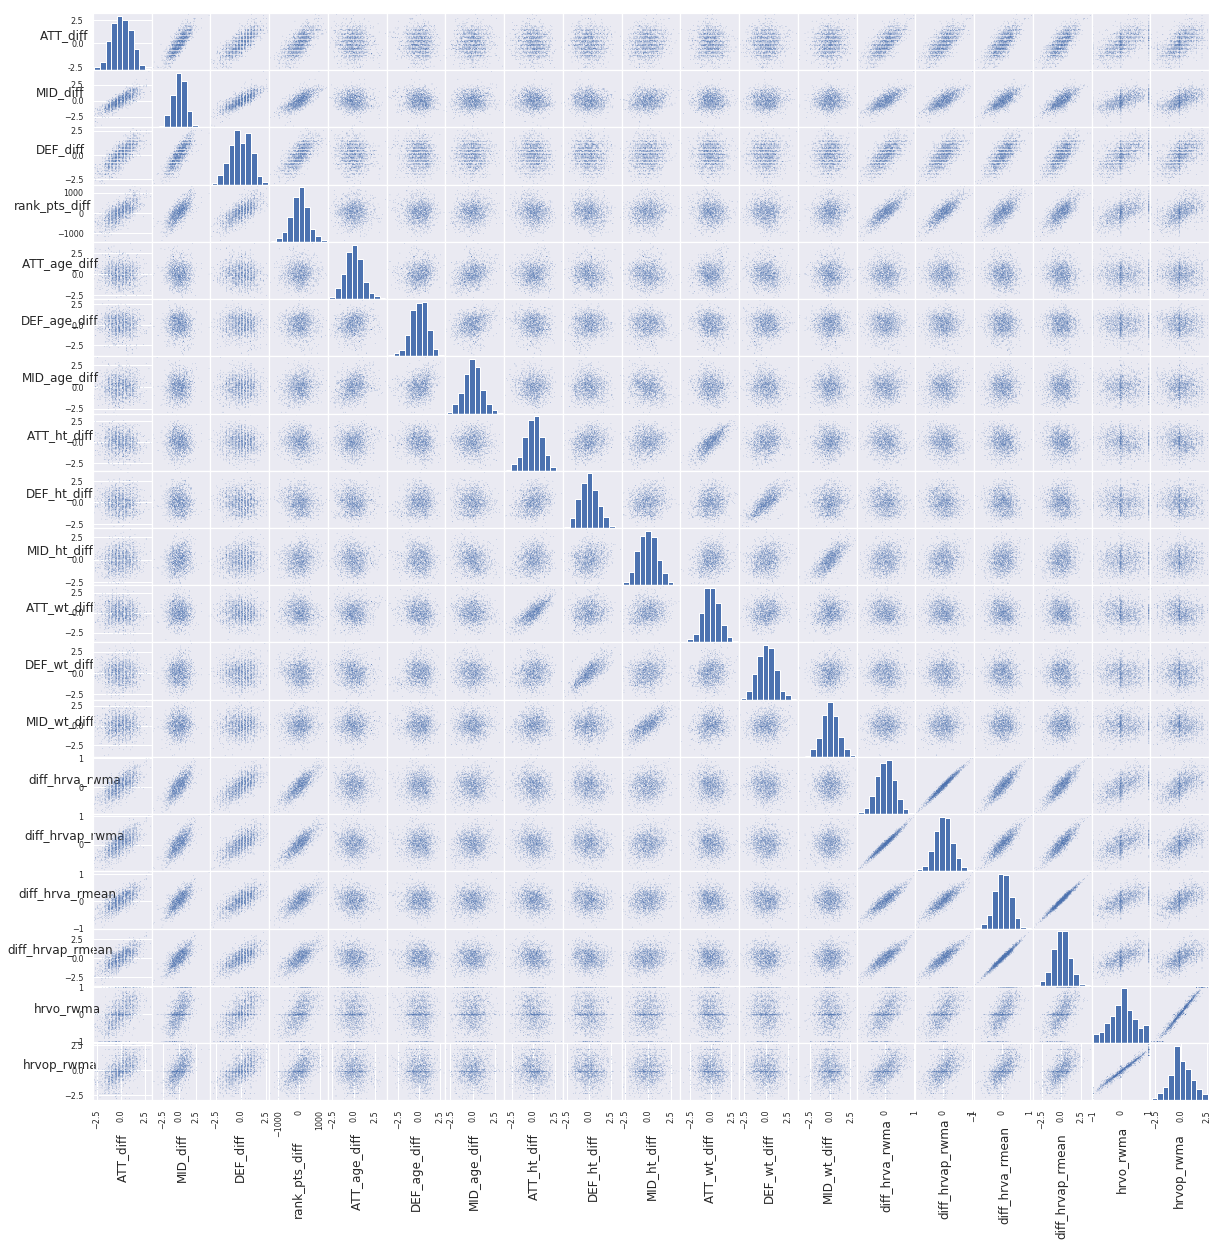

In [36]:
cols = num_cols.copy()

cols.append('outcome_num')

scatter_matrix = pd.plotting.scatter_matrix(train_data[num_cols],
    figsize  = [20, 20],
    marker   = ".",
    s        = 1,
    diagonal = "hist",
    alpha = 1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 0)